In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
import popoff
# from pop_off_functions import save_figure
import pop_off_plotting as pop
import pop_off_functions as pof
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
# from utils.utils_funcs import d_prime

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [3]:
msm = MultiSessionModel(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

## label URH and ARM
for ss in msm.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [4]:
session = msm.sessions[0]
session

instance Mouse J064, run 10 of Session class

<Figure size 7200x7200 with 0 Axes>

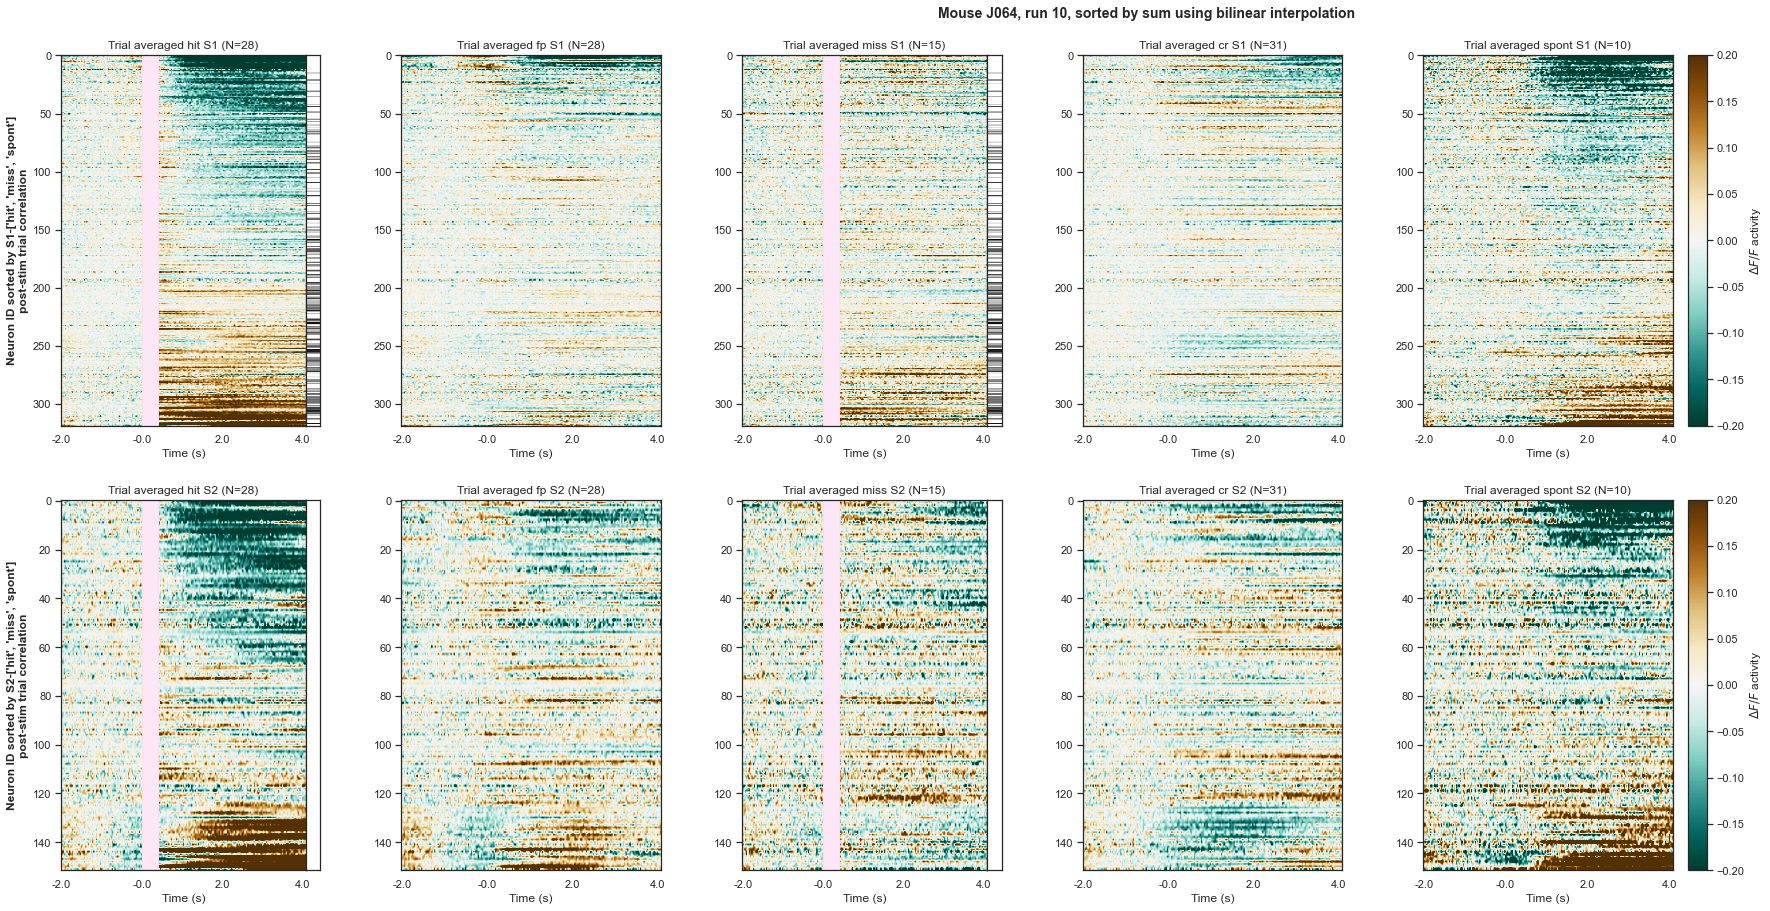

In [5]:
plt.figure(figsize=(100,100))
_ = pop.plot_raster_plots_trial_types_one_session(session, filter_150_stim=True,
          sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum',
                                                 imshow_interpolation='bilinear')
# save_figure('Figure2MATCHEDsorting_raster_bois_with150', figure_path)

In [6]:
(data_use_mat_norm, data_use_mat_norm_s1, data_use_mat_norm_s2, data_spont_mat_norm, ol_neurons_s1, ol_neurons_s2, outcome_arr,
        time_ticks, time_tick_labels, time_axis) = pop.normalise_raster_data(session=session, sorting_method='sum', sort_tt_list=['hit'],
                            sort_neurons=True, filter_150_stim=False)

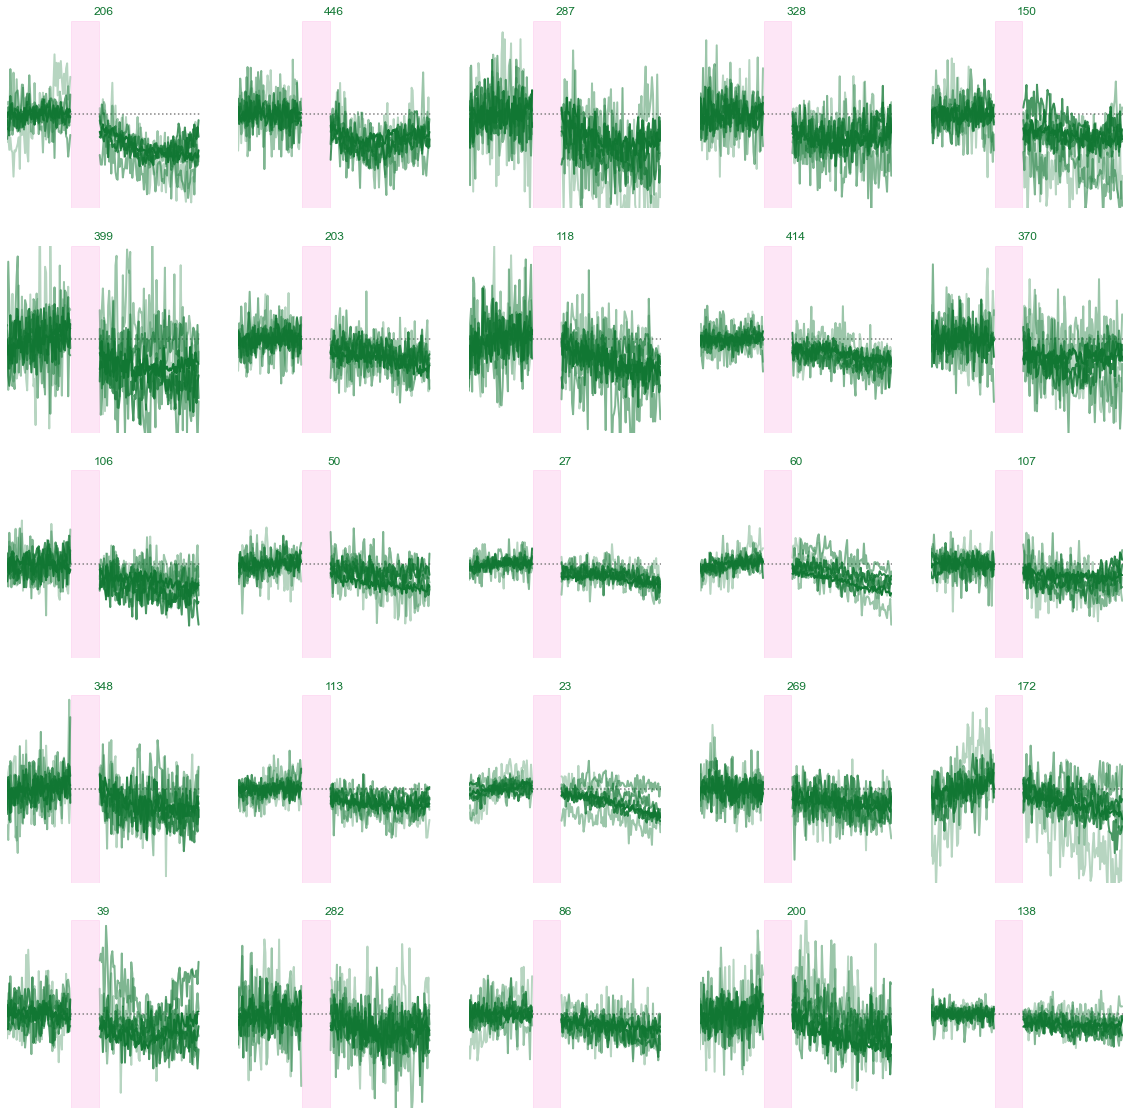

In [7]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
ind_arr = np.where(session.s2_bool)[0][ol_neurons_s2]#[::-1]
i_plot = 0
tt = 'hit'
for i_row in range(5):
    for i_col in range(5):
        cell_id_exc = ind_arr[i_plot + 0]
        _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax[i_row][i_col], plot_title=True, 
                                 plot_indiv=False, plot_total_mean=False, plot_artefact=True,
                                 ylims=(-1, 1),
                                 plot_n_cell_split=(True if tt is not 'prereward' else False))
        ax[i_row][i_col].set_title(cell_id_exc)
        i_plot += 1

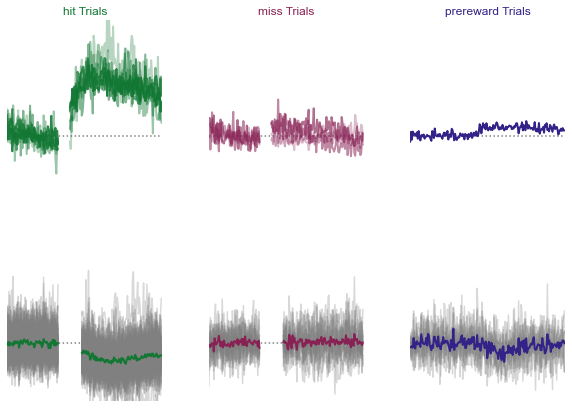

In [8]:
session = msm.sessions[0]

fig, ax = plt.subplots(2, 3, figsize=(10, 7), gridspec_kw={'wspace': 0.3})
cell_id_exc = 163 
cell_id_inh = 446

for i_tt, tt in enumerate(['hit', 'miss', 'prereward']):
    _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax[0][i_tt], plot_title=True, 
                             filter_150_stim=True,
                             plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True)
    _ = pop.single_cell_plot(session, cell_id=cell_id_inh, tt=[tt], ax=ax[1][i_tt], 
                             filter_150_stim=False)


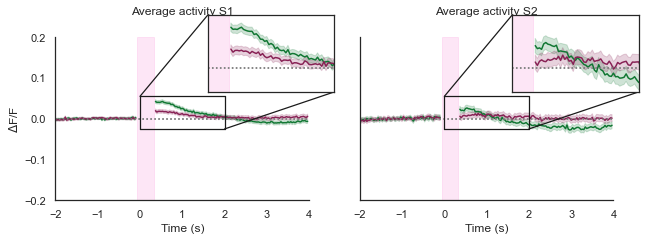

In [9]:
for n_cells in [[5, 10, 20, 30, 40, 50]]:
    tmp = pop.plot_average_tt_s1_s2(msm, n_cells)


In [10]:
# pos = pof.get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='positive', prereward=False)

# neg = pof.get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='negative', prereward=False)
# # 
# np.mean(pos[session.outcome=='cr']) + np.mean(neg[session.outcome=='cr'])

In [5]:
# Used to set the alpha, should be on average across sesssion 5% of cells responding to cr trials

cr_responders = []
for session_idx in range(len(msm.linear_models)):

    session = msm.linear_models[session_idx].session
    
    n_responders = pof.get_percent_cells_responding(session, 's2', direction='positive', prereward=False)
    cr_positive = np.mean(n_responders[session.outcome=='cr'])
    
    n_responders = pof.get_percent_cells_responding(session, 's2', direction='negative', prereward=False)
    cr_negative = np.mean(n_responders[session.outcome=='cr'])
    
    cr_responders.append(cr_positive + cr_negative)
    
print(f'percentage of cells responding to CR trials is {np.round(np.mean(cr_responders), 2)}')
assert np.mean(cr_responders) < 5, 'more than 5% of cells respond to CR trials'


percentage of cells responding to CR trials is 5.31


AssertionError: more than 5% of cells respond to CR trials

In [6]:
perc_hit_dict, perc_miss_dict = {x: {} for x in ['s1', 's2']}, {x: {} for x in ['s1', 's2']}
var_perc_hit_dict, var_perc_miss_dict = {x: {} for x in ['s1', 's2']}, {x: {} for x in ['s1', 's2']}
for reg in ['s1', 's2']:
    for direction in ['positive', 'negative']:
        print(reg, direction)
        tmp = pof.transfer_dict(msm, region=reg, direction=direction)
        perc_hit_dict[reg][direction], perc_miss_dict[reg][direction], var_perc_hit_dict[reg][direction], var_perc_miss_dict[reg][direction] = tmp

s1 positive


/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


s1 negative
s2 positive
s2 negative




s1
positive
hit
r=0.619555087810465
p=1.7717713367512205e-08


miss
r=0.6510882344933305
p=2.440907935850954e-09




s1
negative
hit
r=0.5502209681804386
p=1.170271158573757e-06


miss
r=0.590672606302728
p=1.428140106861331e-07




s2
positive
hit
r=0.011314655164237427
p=0.9270348289333593


miss
r=0.17251904842131346
p=0.16270044415431892




s2
negative
hit
r=0.36798690867453093
p=0.002019494692236305


miss
r=0.45209831449533655
p=0.00012271294434368783




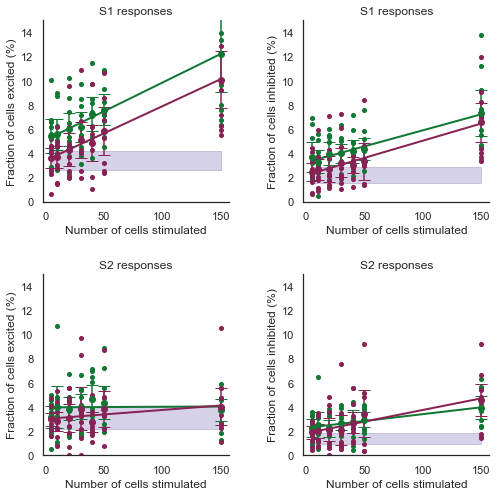

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
for i_reg, reg in enumerate(['s1', 's2']):
    for i_dir, direction in enumerate(['positive', 'negative']):
        print('\n')
        print(reg)
        print(direction)
        
        print('hit')
        pop.plot_transfer_function(dict_activ=perc_hit_dict[reg][direction], 
                                   plot_logscale=False, weighted_regression=False, 
                                   dict_var=var_perc_hit_dict[reg][direction],
                                   label='hit', ax=ax[i_reg][i_dir], plot_indiv_data=True,
                                   verbose=True)
        
        print('miss')
        pop.plot_transfer_function(dict_activ=perc_miss_dict[reg][direction], 
                                   plot_logscale=False, weighted_regression=False, 
                                   dict_var=var_perc_miss_dict[reg][direction],
                                   label='miss', ax=ax[i_reg][i_dir], plot_indiv_data=True,
                                   verbose=True)
        
        pop.plot_spont(msm=msm, region=reg, direction=direction, ax=ax[i_reg][i_dir])
        
        ax[i_reg][i_dir].set_title(f'{reg.upper()} responses')
        if direction == 'positive':
            ax[i_reg][i_dir].set_ylabel('Fraction of cells excited (%)')
        elif direction == 'negative':
            ax[i_reg][i_dir].set_ylabel('Fraction of cells inhibited (%)')
        if reg == 's1':
            ax[i_reg][i_dir].set_ylim(0, 15)
        else:
            ax[i_reg][i_dir].set_ylim(0, 15)
            
        ax[i_reg][i_dir].set_xlabel('Number of cells stimulated')

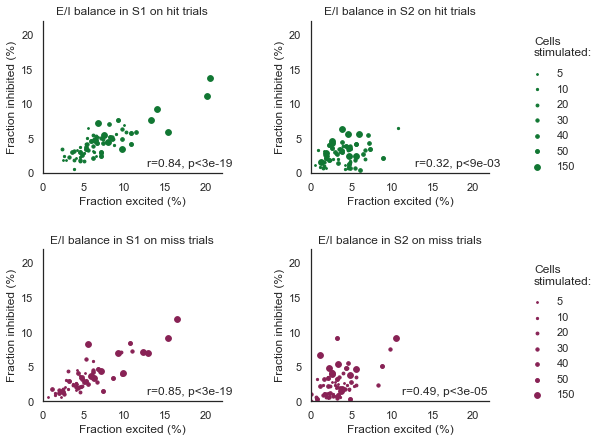

In [14]:
# perc_hit_dict
fig, ax = plt.subplots(2, 2, figsize=(8, 7), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

pop.plot_scatter_balance_stim(dict_activ_full=perc_hit_dict, 
                              ax_s1=ax[0][0], ax_s2=ax[0][1], tt='hit')

pop.plot_scatter_balance_stim(dict_activ_full=perc_miss_dict, 
                              ax_s1=ax[1][0], ax_s2=ax[1][1], tt='miss')

for i_row in [0, 1]:
    for i_col in [0, 1]:
        ax[i_row][i_col].set_xlim(0, 22)
        ax[i_row][i_col].set_ylim(0, 22)

In [ ]:
save_fig = True
session = msm.sessions[0]

fig = plt.figure(constrained_layout=False, figsize=(16, 12))

s2_bottom = 0.6
panel_v_space = 0.35
s1_top = s2_bottom + panel_v_space
inter_panel_space = 0.07
net_panel_space = panel_v_space - inter_panel_space
n_cells_s1 = np.sum(session.s1_bool)
n_cells_s2 = np.sum(session.s2_bool)
n_cells_tot = n_cells_s1 + n_cells_s2
s2_space = (n_cells_s2 / n_cells_tot) * net_panel_space 
s2_top = s2_bottom + s2_space
s1_bottom = s2_top + inter_panel_space
            
gs_rasters_top = fig.add_gridspec(ncols=3, nrows=1, bottom=s1_bottom, top=s1_top, right=0.4, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_rasters_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=s2_bottom, top=s2_top, right=0.4, left=0.05,
                              wspace=0.4, hspace=0.4)


gs_rasters_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=s2_bottom+0.07, top=s1_top-0.13, right=0.415,
                                   left=0.405, wspace=0.1, hspace=0.1) 

gs_example_cells = fig.add_gridspec(ncols=2, nrows=1, bottom=0.81, top=0.95, right=0.85, left=0.5,
                              wspace=0.7, hspace=0.4)
gs_pop_activity = fig.add_gridspec(ncols=2, nrows=1, bottom=0.6, top=0.74, right=0.85, left=0.5,
                              wspace=0.7, hspace=0.4)
gs_transfer = fig.add_gridspec(ncols=4, nrows=1, bottom=0.34, top=0.5, right=0.85, left=0.05,
                              wspace=0.7, hspace=0.4)
gs_balance = fig.add_gridspec(ncols=4, nrows=1, bottom=0.05, top=0.22, right=0.85, left=0.05,
                              wspace=0.7, hspace=0.4)

bool_filter_150 = True  # if true, do not use 150 cells stim in panels A-C

## Rasters     
ax_raster = {}
for i_reg, reg in enumerate(['s1', 's2']):
    ax_raster[reg] = {}
    for i_x, xx in enumerate(['hit', 'miss', 'spont']):
        if reg == 's1':
            ax_raster[reg][xx] = fig.add_subplot(gs_rasters_top[i_x])
        else:
            ax_raster[reg][xx] = fig.add_subplot(gs_rasters_bottom[i_x])
cax_raster = fig.add_subplot(gs_rasters_cbar[0])
pop.plot_raster_plots_input_trial_types_one_session(session=session, ax_dict=ax_raster, cax=cax_raster,
                                                    cbar_pad=1.35,
                                        filter_150_stim=bool_filter_150, imshow_interpolation='bilinear',
                                          sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum')
for i_reg, reg in enumerate(['s1', 's2']):
    for i_x, xx in enumerate(['hit', 'miss', 'spont']):
        if xx != 'hit':
            ax_raster[reg][xx].set_ylabel('')
        if reg == 's1':
            ax_raster[reg][xx].set_xlabel('')
            
## Example cells
cell_id_exc = 163 
cell_id_inh = 446
ax_example_cell = {xx: fig.add_subplot(gs_example_cells[xx]) for xx in range(2)}
for i_tt, tt in enumerate(['prereward', 'miss', 'hit']):
    _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax_example_cell[0], 
                             plot_title=False, plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True, filter_150_stim=bool_filter_150, #ylims=(-2, 2),
                             smooth_traces=True, plot_artefact=(tt == 'hit'),
                             plot_tt_descr=True)
    _ = pop.single_cell_plot(session, cell_id=cell_id_inh, tt=[tt], ax=ax_example_cell[1], 
                             plot_title=False, plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True, filter_150_stim=bool_filter_150, #ylims=(-0.7, 0.7),
                             smooth_traces=True, plot_artefact=(tt == 'hit'), 
                             plot_legend_n_cells=(tt == 'hit'))
assert session.s2_bool[cell_id_exc] and session.s2_bool[cell_id_inh]
ax_example_cell[0].set_title('Most excited S2 cell')
ax_example_cell[1].set_title('Most inhibited S2 cell')
leg_example = ax_example_cell[1].get_legend()
for han in leg_example.legendHandles:
    han.set_color('grey')
## Scale bar:
ax_example_cell[0].plot([5.8, 6.8], [0, 0], c='k', linewidth=2, clip_on=False)
ax_example_cell[0].plot([5.8, 5.8], [0, 1], c='k', linewidth=2, clip_on=False)
ax_example_cell[0].text(s='1s', x=6.3, y=-0.35, ha='center')
ax_example_cell[0].text(s='1 ' + r"$\Delta F/F$", x=5.15, y=0.5, rotation=90, va='center')    
    
## Population activity
ax_pop_activity = {xx: fig.add_subplot(gs_pop_activity[xx]) for xx in range(2)}
if bool_filter_150:
    n_cell_list = [[5, 10, 20, 30, 40, 50]]
else:
    n_cell_list = [[5, 10, 20, 30, 40, 50, 150]]
for n_cells in n_cell_list:
    tmp = pop.plot_average_tt_s1_s2(msm, n_cells, #ylims=(-0.2, 0.2),
                                   ax_s1=ax_pop_activity[0], ax_s2=ax_pop_activity[1])
ax_pop_activity[0].set_title('Grand average S1', y=1.15)
ax_pop_activity[1].set_title('Grand average S2', y=1.15)
    
## Transfer function:
ax_transfer = {xx: fig.add_subplot(gs_transfer[xx]) for xx in range(4)}
i_ax = 0
for i_reg, reg in enumerate(['s1', 's2']):
    for i_dir, direction in enumerate(['positive', 'negative']):
        pop.plot_transfer_function(dict_activ=perc_hit_dict[reg][direction], 
                                   plot_logscale=False, indicate_spont_ci=(i_reg == 0 and i_dir ==0),
                                   label='hit', ax=ax_transfer[i_ax], plot_indiv_data=False)
        
        pop.plot_transfer_function(dict_activ=perc_miss_dict[reg][direction], 
                                   plot_logscale=False,
                                   label='miss', ax=ax_transfer[i_ax], plot_indiv_data=False)
        
        pop.plot_spont(msm=msm, region=reg, direction=direction, ax=ax_transfer[i_ax])
        if direction == 'positive':
            ax_transfer[i_ax].set_title(f'Excited {reg.upper()} responses')
        elif direction == 'negative':
            ax_transfer[i_ax].set_title(f'Inhibited {reg.upper()} responses')
        if direction == 'positive':
            ax_transfer[i_ax].set_ylabel('Fraction excited (%)')
        elif direction == 'negative':
            ax_transfer[i_ax].set_ylabel('Fraction inhibited (%)')
        if reg == 's1':
            ax_transfer[i_ax].set_ylim(0, 16)
        else:
            ax_transfer[i_ax].set_ylim(0, 7)
            
        ax_transfer[i_ax].set_xlabel('Number of cells stimulated')
        i_ax += 1
        
## Balance
ax_balance = {xx: fig.add_subplot(gs_balance[xx]) for xx in range(4)}
pop.plot_scatter_balance_stim(dict_activ_full=perc_hit_dict, plot_legend=False,
                              ax_s1=ax_balance[0], ax_s2=ax_balance[2], tt='hit',
                             verbose=1)

pop.plot_scatter_balance_stim(dict_activ_full=perc_miss_dict, verbose=1,
                              ax_s1=ax_balance[1], ax_s2=ax_balance[3], tt='miss')
pop.equal_lims_two_axs(ax1=ax_balance[0], ax2=ax_balance[1])
leg_balance = ax_balance[3].get_legend()
for han in leg_balance.legendHandles:
    han.set_color('grey')

## Align & labels:
for i_ax in range(1, 4):
    fig.align_ylabels(axs=[ax_transfer[i_ax], ax_balance[i_ax]])
fig.align_ylabels(axs=[ax_raster['s1']['hit'], ax_raster['s2']['hit'],  ax_transfer[0], ax_balance[0]])

ax_lab = ax_raster['s1']['hit']
ax_lab.text(s='A', x=-47, y=-15, fontdict={'weight': 'bold'})
ax_lab.text(s='B', x=450, y=-15, fontdict={'weight': 'bold'})
ax_lab.text(s='C', x=450, y=307, fontdict={'weight': 'bold'})
ax_lab.text(s='D', x=-47, y=740, fontdict={'weight': 'bold'})
ax_lab.text(s='E', x=440, y=740, fontdict={'weight': 'bold'})
ax_lab.text(s='F', x=-47, y=1210, fontdict={'weight': 'bold'})
ax_lab.text(s='G', x=440, y=1210, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig2_v-six-rasters.pdf',
               bbox_inches='tight')

## Raster supp

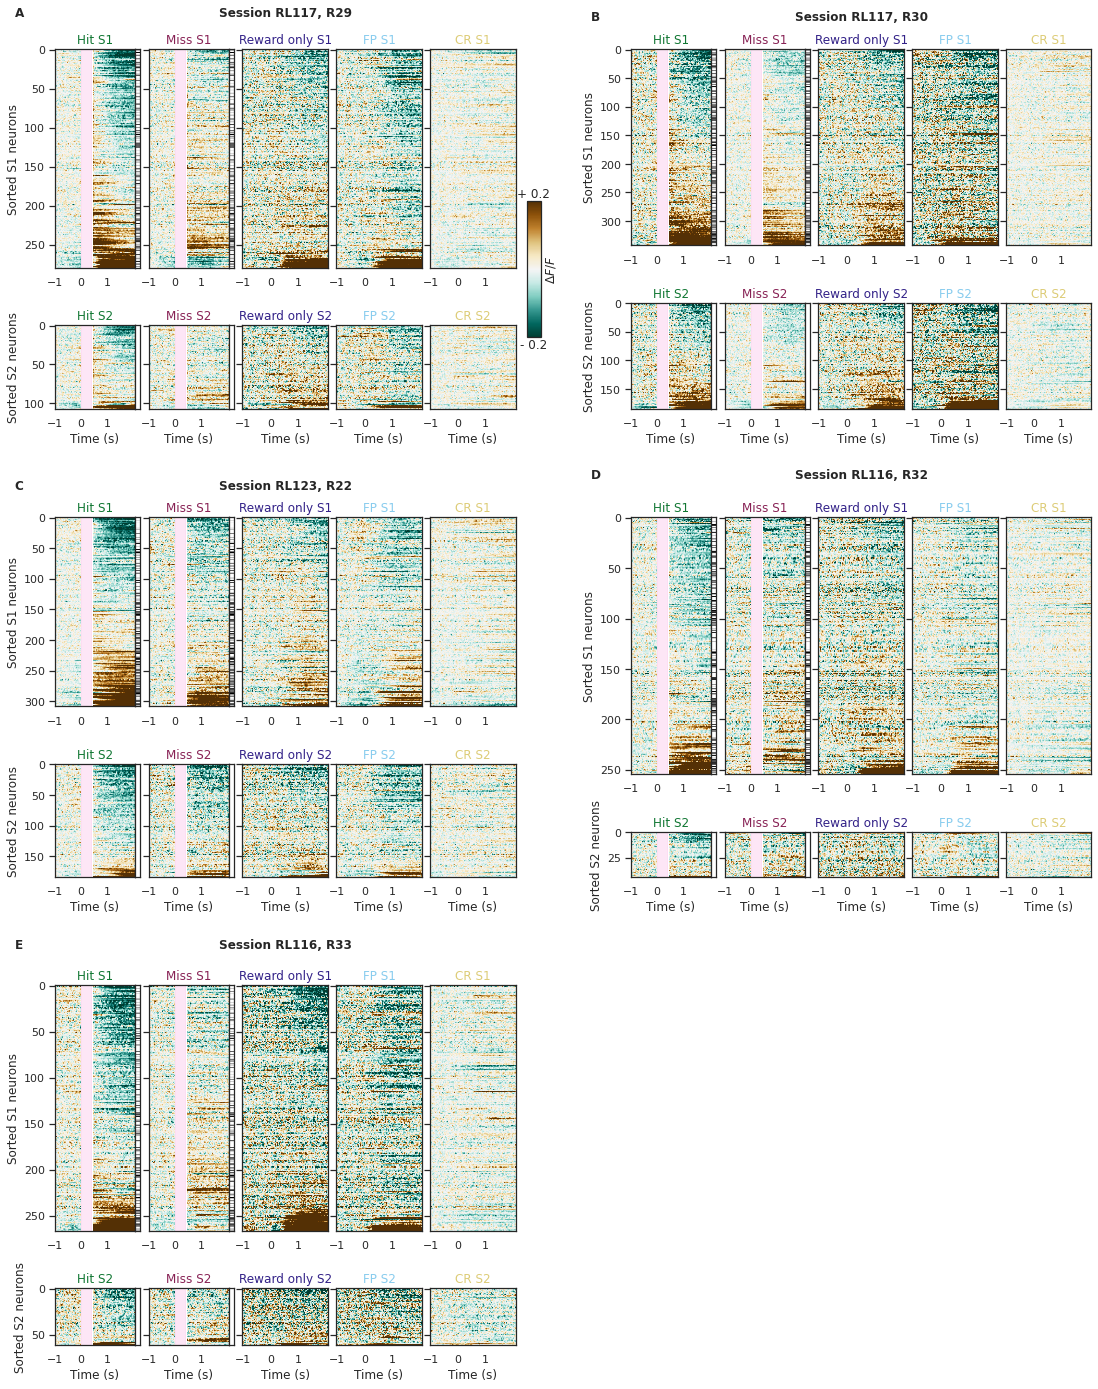

In [35]:
save_fig = False

### Two figs cover 6 and 4 sessions resp.. Select one of two file settings below:

## File -1:
# session_inds = [[0, 1], [2, 3], [4, 5]]
# suffix_file = '-1'

## File -2:
session_inds = [[6, 7], [8, 9], [10]]
suffix_file = '-2'


### Plotting:
fig = plt.figure(constrained_layout=False, figsize=(16, 20))
bool_filter_150 = True  # if true, do not use 150 cells stim in panels A-C
    
ax_raster = {}
gs_rasters_top = {}
gs_rasters_bottom = {}

label_list = ['A', 'B', 'C', 'D', 'E', 'F']

## Rasters    
i_plot = 0
for ilist, list_ss_id in enumerate(session_inds):
    for irow, sess_id in enumerate(list_ss_id):
        session = msm.sessions[sess_id]
        ax_raster[sess_id] = {}
        for i_reg, reg in enumerate(['s1', 's2']):
            ax_raster[sess_id][reg] = {}
            if irow == 0:
                leftcoord = 0.05
                rightcoord = 0.45
            elif irow == 1:
                leftcoord = 0.55
                rightcoord = 0.95
            if ilist == 0:
                s2_bottom = 0.7
            elif ilist == 1:
                s2_bottom = 0.375
            elif ilist == 2:
                s2_bottom = 0.05
            panel_v_space = 0.25
            s1_top = s2_bottom + panel_v_space
#             inter_v_space = 0.075
            inter_panel_space = 0.04
            net_panel_space = panel_v_space - inter_panel_space
            n_cells_s1 = np.sum(session.s1_bool)
            n_cells_s2 = np.sum(session.s2_bool)
            n_cells_tot = n_cells_s1 + n_cells_s2
            s2_space = (n_cells_s2 / n_cells_tot) * net_panel_space 
            s2_top = s2_bottom + s2_space
            s1_bottom = s2_top + inter_panel_space
            if ilist == 0 and irow == 0:
                gs_rasters_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=s2_bottom+0.05, top=s1_top-0.105, 
                                                   right=rightcoord + 0.022, left=rightcoord + 0.01,
                                                   wspace=0.4, hspace=0.4)
                bool_cb = True
#                 gs_rasters_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=s2_bottom+0.07, top=s1_top-0.13, right=0.415,
#                                    left=0.405, wspace=0.1, hspace=0.1) 
                cax_raster = fig.add_subplot(gs_rasters_cbar[0])
                pop.naked(cax_raster)
            else:
                bool_cb = False
                cax_raster = None

            
            gs_rasters_top[sess_id] = fig.add_gridspec(ncols=5, nrows=1, bottom=s1_bottom, top=s1_top, 
                                                       right=rightcoord, left=leftcoord,
                                                      wspace=0.1, hspace=0.4)
            gs_rasters_bottom[sess_id] = fig.add_gridspec(ncols=5, nrows=1, bottom=s2_bottom, top=s2_top, 
                                                          right=rightcoord, left=leftcoord,
                                                          wspace=0.1, hspace=0.4)

            for i_x, xx in enumerate(['hit', 'miss', 'spont', 'fp', 'cr']):
                if reg == 's1':
                    ax_raster[sess_id][reg][xx] = fig.add_subplot(gs_rasters_top[sess_id][i_x])
                else:
                    ax_raster[sess_id][reg][xx] = fig.add_subplot(gs_rasters_bottom[sess_id][i_x])
       
        pop.plot_raster_plots_input_trial_types_one_session(session=session, ax_dict=ax_raster[sess_id], cax=cax_raster,
                                                filter_150_stim=bool_filter_150, imshow_interpolation='bilinear',
                                                            bool_cb=bool_cb,
                                                  sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum')
#         if cax_raster is not None:
#             print(cax_raster.get_yticks(), cax_raster.get_yticklabels())
#             cax_raster.set_xticklabels([])
#             cax_raster.set_yticklabels([])
        for i_reg, reg in enumerate(['s1', 's2']):
            for i_x, xx in enumerate(['hit', 'miss', 'spont', 'fp', 'cr']):
                ax_tmp = ax_raster[sess_id][reg][xx]
                if xx != 'hit':
                    ax_tmp.set_ylabel('')
                    ax_tmp.set_yticklabels(['' for x in ax_tmp.get_yticks()])
                if reg == 's1':
                    ax_tmp.set_xlabel('')
                    if xx == 'hit':
                        ax_tmp.annotate(text=label_list[i_plot],
                                        weight='bold', xy=(-0.5, 1.15), xycoords='axes fraction')
                      
                    elif xx == 'spont':
                        ax_tmp.annotate(text='Session ' + session.mouse + ', R' + str(session.run_number),
                                        weight='bold', ha='center', xy=(0.5, 1.15), xycoords='axes fraction')
                        
        i_plot += 1
if save_fig:
#     fpath = os.path.expanduser(f'~/Documents/code/popping-off/'
#                                f'figures/full_figs_manuscript/fig2_supp_all-rasters{suffix_file}.pdf')
    
    fpath = f'/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig2_supp_all-rasters{suffix_file}.pdf'
    plt.savefig(fpath, bbox_inches='tight')